<a href="https://colab.research.google.com/github/wmxof/Club_Object/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.44.1/bin/'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)

print("학습 데이터 개수 : " + str(len(x_train)))
print("테스트 데이터 개수 : "+str(len(x_test)))

dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_train)
accuracy = accuracy_score(y_train, pred)
print("학습 데이터 검증 정확도 : "+str(accuracy))

pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("테스트 데이터 검증 정확도 : ", str(accuracy))

학습 데이터 개수 : 120
테스트 데이터 개수 : 30
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.9333333333333333


## train/test data
x_train : 학습용 피처 데이터 세트. 즉, 머신러닝 모델이 학습하지 않은 독립 변수 데이터. 예측시키려는 데이터.  
y_train :  학습용 레이블 데이터 세트. 즉, x_test 데이터의 실제 결과 값(종속변수)를 포함함.   
&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;즉, 머신러닝의 목표는 x_train를 y_train에 일치시키는 것과 같다.  
  
#    
x_test :  테스트용 피처 데이터 세트. 즉, 머신러닝 모델이 학습하지 않은 독립 변수 데이터  
y_test :   테스트용 레이블 데이터 세트. 즉, x_test 데이터의 실제 결과 값(종속변수)를 포함함  

---
#  
## 함수 설명
* load_iris() : sklearn.datasets 모듈에 있는 백합 데이터를 불러옴
* train_test_split() : train data, test data를 나눔.
파라미터 : 데이터, 타겟변수, test data 비율, 랜덤 시드(섞인 데이터를 고정시키기 위함)  
* predict() : 파라미터로 받은 변수로 값을 예측하는 함수.

In [ ]:
feature_imp = dt_clf.feature_importances_

for name, value in zip(iris_data.feature_names, feature_imp):
    print(f"{name}: {value:.4f}")

sepal length (cm): 0.0250
sepal width (cm): 0.0000
petal length (cm): 0.5549
petal width (cm): 0.4201


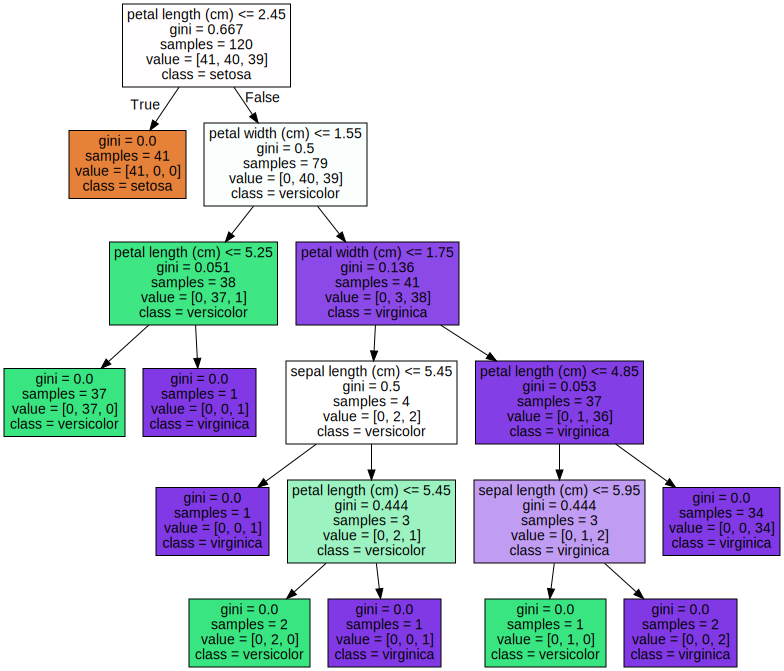

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

학습 데이터 검증 정확도 : 0.9666666666666667
테스트 데이터 검증 정확도 :  0.9333333333333333


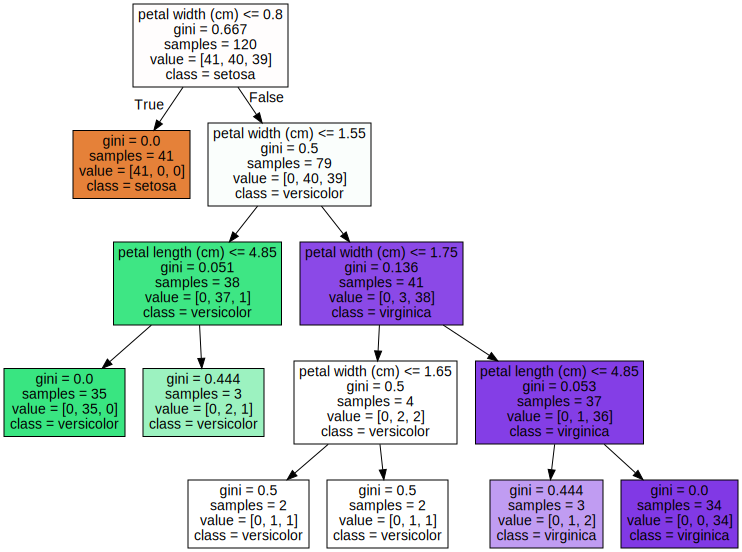

In [ ]:
def iris_tree_hyper(max_dep=4, min_ss=4, min_sl=2):
    dt_clf = DecisionTreeClassifier(random_state = 22, max_depth = max_dep, min_samples_split=min_ss,min_samples_leaf= min_sl)

    dt_clf.fit(x_train, y_train)

    export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

    with open("tree.dot") as f:
        dot_graph = f.read()


    pred = dt_clf.predict(x_train)
    accuracy = accuracy_score(y_train, pred)
    print("학습 데이터 검증 정확도 : "+str(accuracy))

    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print("테스트 데이터 검증 정확도 : ", str(accuracy))

    return graphviz.Source(dot_graph)

iris_tree_hyper()

## iris_tree_hyper : 하이퍼 파라미터를 정하기 위한 함수  
* max_dep : 트리의 최대 깊이  
* min_ss : min_samples_split. 최소 샘플 데이터 분할 수   
* min_sl : min_samples_leaf. 최소 리프노드 개수


학습 데이터 개수 : 455
테스트 데이터 개수 : 114
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.9649122807017544
하이퍼파라미터 이용한 결과

학습 데이터 검증 정확도 : 0.9758241758241758
테스트 데이터 검증 정확도 :  0.956140350877193


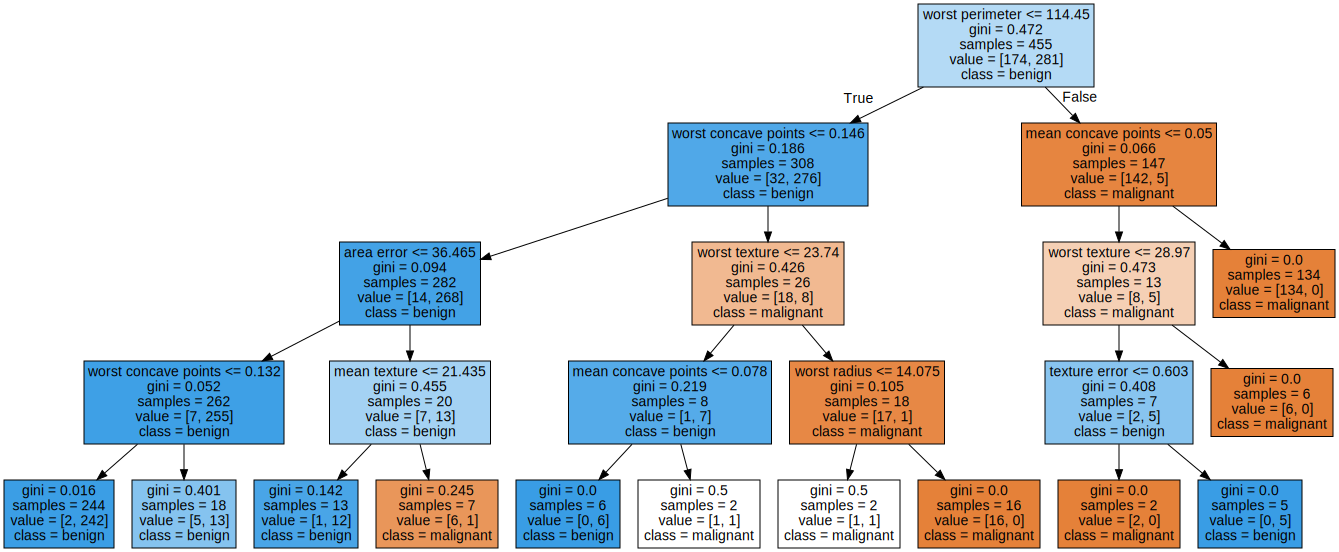

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)

print("학습 데이터 개수 : " + str(len(x_train)))
print("테스트 데이터 개수 : "+str(len(x_test)))

dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_train)
accuracy = accuracy_score(y_train, pred)
print("학습 데이터 검증 정확도 : "+str(accuracy))

pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("테스트 데이터 검증 정확도 : ", str(accuracy))

print("하이퍼파라미터 이용한 결과\n")

def cancer_tree_hyper(max_dep=4, min_ss=4, min_sl=2):
    dt_clf = DecisionTreeClassifier(random_state = 22, max_depth = max_dep, min_samples_split=min_ss,min_samples_leaf= min_sl)

    dt_clf.fit(x_train, y_train)

    export_graphviz(dt_clf, out_file="tree.dot", class_names = cancer_data.target_names, feature_names = cancer_data.feature_names, impurity = True, filled = True)

    with open("tree.dot") as f:
        dot_graph = f.read()


    pred = dt_clf.predict(x_train)
    accuracy = accuracy_score(y_train, pred)
    print("학습 데이터 검증 정확도 : "+str(accuracy))

    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print("테스트 데이터 검증 정확도 : ", str(accuracy))

    return graphviz.Source(dot_graph)

cancer_tree_hyper()

In [ ]:
num=2


for num in range(2, 11):
    print(f"깊이가 {num}인 트리")

    def cancer_tree_hyper(max_dep=num):
        dt_clf = DecisionTreeClassifier(random_state = 22, max_depth = max_dep)

        dt_clf.fit(x_train, y_train)

        pred = dt_clf.predict(x_train)
        accuracy = accuracy_score(y_train, pred)
        print("학습 데이터 검증 정확도 : "+str(accuracy))

        pred = dt_clf.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        print("테스트 데이터 검증 정확도 : ", str(accuracy))
    cancer_tree_hyper()

    print("\n")

    num =+ 1



깊이가 2인 트리
학습 데이터 검증 정확도 : 0.9406593406593406
테스트 데이터 검증 정확도 :  0.9649122807017544


깊이가 3인 트리
학습 데이터 검증 정확도 : 0.9604395604395605
테스트 데이터 검증 정확도 :  0.9649122807017544


깊이가 4인 트리
학습 데이터 검증 정확도 : 0.9802197802197802
테스트 데이터 검증 정확도 :  0.956140350877193


깊이가 5인 트리
학습 데이터 검증 정확도 : 0.9934065934065934
테스트 데이터 검증 정확도 :  0.956140350877193


깊이가 6인 트리
학습 데이터 검증 정확도 : 0.9956043956043956
테스트 데이터 검증 정확도 :  0.9649122807017544


깊이가 7인 트리
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.956140350877193


깊이가 8인 트리
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.956140350877193


깊이가 9인 트리
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.956140350877193


깊이가 10인 트리
학습 데이터 검증 정확도 : 1.0
테스트 데이터 검증 정확도 :  0.956140350877193




최대 깊이가 깊어질수록 학습 데이터 검증 정확도가 증가한다.
그러나, 최대 깊이가 깊어지면 테스트 데이터 검증 정확도가 오히려 떨어진다.

**이유 : 과적합**

물론, 그렇다고 최대 깊이가 낮을수록 좋은 모델도 아니다.
학습이 충분히 이루어지지 않아 과소적합이 발생할 수 있기 때문이다.